In [1]:
import pandas as pd  

df = pd.read_csv("sample_data.csv")  

df.head() 

,Name,Age,Salary,Department
0,John,25,50000,HR
1,NaN,30,60000,IT
2,Anna,,55000,Finance
3,Mark,40,80000,HR
4,Sarah,35,NaN,IT


In [2]:
df.columns = df.columns.str.strip()  

In [3]:
# Remove leading/trailing spaces and force conversion to numbers
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")


In [4]:
df["Salary"] = df["Salary"].str.strip()  
df["Salary"] = pd.to_numeric(df["Salary"], errors="coerce")  


In [5]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())


In [6]:
# Fill missing categorical values with "Unknown"
df["Department"] = df["Department"].fillna("Unknown")

In [7]:
# Display cleaned data
df.head()

,Name,Age,Salary,Department
0,John,25.0,50000.0,HR
1,NaN,30.0,60000.0,IT
2,Anna,32.5,55000.0,Finance
3,Mark,40.0,80000.0,HR
4,Sarah,35.0,61250.0,IT


In [8]:
"np" in globals()  


False

In [9]:
import numpy as np

Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["Salary"] < lower_bound) | (df["Salary"] > upper_bound)]


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Age", "Salary"]] = scaler.fit_transform(df[["Age", "Salary"]])

df.head()
# Reverse Min-Max Scaling before saving
original_min_age = 25  # Replace with actual min
original_max_age = 40  # Replace with actual max
original_min_salary = 50000  # Replace with actual min
original_max_salary = 80000  # Replace with actual max

df["Age"] = df["Age"] * (original_max_age - original_min_age) + original_min_age
df["Salary"] = df["Salary"] * (original_max_salary - original_min_salary) + original_min_salary


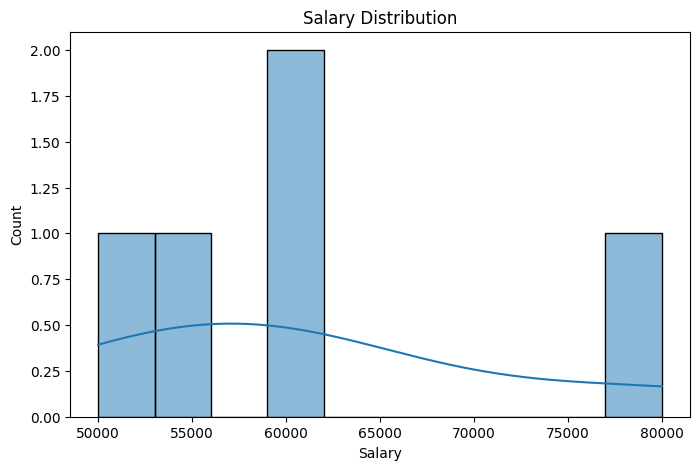

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["Salary"], bins=10, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()


In [12]:
df.to_csv("cleaned_data.csv", index=False)


In [13]:
import os
